<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Distribuzione geometrica.
</div>
<hr style="width: 90%;" align="left" />


<div id="h-0"></div>

# La distribuzione geometrica

La *distribuzione geometrica* descrive il numero di insuccessi necessari affinché si verifichi il primo successo in una successione di esperimenti bernoulliani indipendenti e identicamente distribuiti. Questa distribuzione, che ha quindi come supporto l'insieme dei numeri naturali (zero incluso), è quindi completamente descritta specificando il parametro $p$ del corrispondente esperimento bernoulliano. Più precisamente, $p \in (0, 1]$: il caso $p=0$ va infatti escluso a priori, altrimenti sarebbe impossibile avere come esito un successo (e dunque sarebbe impossibile contare il numero di insuccessi prima che si verifichi un successo). Il caso $p=1$ può essere incluso nell'insieme dei valori validi per il parametro, sebbene questa scelta identifichi un esperimento bernoulliano che ha sempre successo: in tal caso, la variabile aleatoria che conteggia il numero di insuccessi prima del primo successo degenera nel valore costante pari a zero.

<div class="alert alert-info">
In alternativa sarebbe possibile definire la distribuzione geometrica contando il numero totale di esperimenti necessari per ottenere il primo successo. In questo modo si conteggerebbe un esperimento in più rispetto a quanto visto (l'esperimento in cui si ottiene il successo). Ovviamente la distribuzione ottenuta avrebbe delle proprietà (come per esempio il valore atteso e la varianza) diversi da quelli che otterremo.
</div>

Un modo intuitivo di simulare dei valori estratti da una distribuzione geometrica consiste nel simulare ripetutamente l'esecuzione del relativo esperimento bernoulliano, conteggiando il numero di tentativi che precedono il primo successo. Tenuto conto del fatto che un esperimento bernoulliano di parametro $p$ si può simulare estraendo un numero pseudocasuale uniformemente distribuito in $[0, 1]$ (compito effettuato per esempio dalla funzione `random` nel modulo omonimo) e decretando un successo se il risultato è inferiore a $p$ e un fallimento altrimenti, la seguente funzione permette di ottenere valori per una generica distribuzione geometrica, specificando il valore del corrispondente parametro. L'implementazione verifica anche che il valore specificato per il parametro sia valido.

In [1]:
import random as rnd

def geom(p):
    assert p > 0 and p <= 1, '{} is not a valid parameter' \
                             ' for the geometric distribution.'.format(p)
    i = 0
    while rnd.random() >= p:
        i +=1
    return i

[geom(.3) for _ in range(10)]

[0, 5, 5, 0, 3, 0, 0, 1, 0, 2]

Si potrebbe dimostrare che esistono metodi che utilizzano approcci più efficienti per affrontare questa distribuzione, per esempio evitando l'uso di cicli. Un esempio di  package `scipy.stats` mette a disposizione una classe `geom`, da inizializzare specificando come argomento il valore di $p$ e utilizzabile (tra le altre cose) per simulare un array di specificazioni invocando il metodo `rvs` che accetta come argomento la dimensione di tale array.

In [2]:
from scipy.stats import geom

g = geom(.3)
g.rvs(10)

array([4, 8, 3, 2, 4, 2, 4, 1, 3, 1])

Tenuto conto dell'indipendenza tra le ripetizioni dell'esperimento bernoulliano, richiedere che il primo successo sia avvenuto esattamente dopo $i$ insuccessi equivale a calcolare la probabilità di $i$ insuccessi successivi, seguiti da un successo. Pertanto la distribuzione geometrica ha la seguente funzione di massa di probabilità:

\begin{equation}
f_X(i; p) = p (1-p)^i \mathrm I_{\mathbb N \cup \{0\}}(i).
\end{equation}

Si verifica facilmente che sommando i valori di massa di probabilità per tutte le specificazioni si ottiene come risultato 1:

\begin{equation}
\sum_{i=0}^{+\infty}f_X(i; p) = \sum_{i=0}^{+\infty}p (1-p)^i = p \sum_{i=0}^{+\infty}(1-p)^i = p \frac{1}{1-(1-p)} = 1.
\end{equation}

La penultima uguaglianza è basata sulla convergenza della _serie geometrica_: $\sum_{i=0}^{+\infty} \alpha^i = \frac{1}{1-\alpha}$ per ogni $\alpha$ tale che $|\alpha| < 1$. È da questo fatto che la distribuzione geometrica prende il suo nome.

Nella cella seguente viene definita una funzione `geom_pdf` che accetta come argomenti rispettivamente un valore reale $x$ e un possibile parametro $p$ e restituisce il valore della funzione di probabilità geometrica. La funzione è costruito in modo da associare massa nulla ai punti al di fuori del dominio, verificando anche in questo caso che il parametro specificato assuma un valore valido.

In [3]:
def geom_pdf(x, p):
    assert p > 0 and p <= 1, '{} is not a valid parameter ' \
                             'for the geometric distribution.'.format(p)
    
    return p * (1 - p)**x if x > 0 and x==int(x) else 0

È quindi possibile visualizzare i valori di massa di probabilità, fissando per esempio $p=\frac{1}{2}$ e usando un grafico a bastoncini (così da evidenziare che le masse di probabilità sono associate a singoli valori). Ovviamente la visualizzazione dovrà coinvolgere un sottoinsieme delle possibili specificazioni, essendo il dominio della distribuzione infinito. Nella versione interattiva degli appunti è possibile modificare il valore di $p$ rigenerando automaticamente il grafico.

In [4]:
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np


def gr_geom_pdf(p):
    x = np.arange(0, 10, 1)
    plt.vlines(x, [0]*len(x), list(map(lambda _: geom_pdf(_, p), x)))
    plt.plot(x, list(map(lambda _: geom_pdf(_, p), x)), 'o')
    plt.ylim(ymax=1, ymin=0)
    plt.xlim(xmax=11, xmin = -1)
    plt.show()

interact(gr_geom_pdf, p=(0.1, 1, 0.1))
plt.show()

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, min=0.1), Output()), _dom_classes=('wid…

Procediamo ora a determinare il valore atteso e la varianza della distribuzione. Iniziamo mostrando un risultato intermedio.

**Lemma**. Per ogni $\alpha \in (-1, 1)$

\begin{equation}
\sum_{i=0}^{+\infty}i \alpha^i = \frac{\alpha}{(1-\alpha)^2}.
\end{equation}

Dimostrazione.

\begin{align}
\sum_{i=0}^{+\infty}i \alpha^i &= \alpha \sum_{i=0}^{+\infty}i \alpha^{i-1} \\
&= \alpha \sum_{i=0}^{+\infty} \frac{\mathrm d}{\mathrm d \alpha} \alpha^i \\
&= \alpha \frac{\mathrm d}{\mathrm d \alpha} \sum_{i=0}^{+\infty} \alpha^i \\
&= \alpha \frac{\mathrm d}{\mathrm d \alpha} \frac{1}{1-\alpha} \\
&= \alpha \frac{1}{(1-\alpha)^2}.
\end{align}

Questo risultto ci permette di calcolare agevolmente il valore atteso. 

**Proposizione**. Il valore atteso della distribuzione geometrica di parametro $p$ è pari a $\frac{1-p}{p}$.

Dimostrazione. Innanzitutto

\begin{align}
\mathrm E(X) &= \sum_{i=0}^{+ \infty} i f_X(i; p)\\
             &= \sum_{i=0}^{+ \infty} i p (1-p)^i \\        
             &= p \sum_{i=0}^{+ \infty} i (1-p)^i,
\end{align}

e quindi per il lemma appena dimostrato si ha, ponendo $\alpha = 1-p$,

\begin{equation}
\mathrm E(X) = p \frac{1 - p}{p^2} = \frac{1-p}{p}.
\end{equation}

Visualizziamo graficamente l'andamento del valore atteso in funzione del parametro $p$.

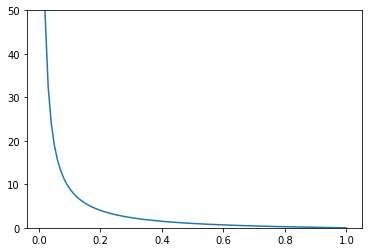

In [5]:
x = np.arange(0.01, 1.01, 0.01)
y = list(map(lambda p: (1-p)/p, x))

plt.plot(x, y)
plt.ylim(0, 50)
plt.show()

Il risultato è coerente con il significato di $p$: più il suo valore si avvicina a $1$, più è probabile che si ottenga un successo nel primo esperimento, così che il numero atteso di insuccessi tende a zero. Parimenti, al diminuire di $p$ diventa meno probabile ottenere un successo e quindi il numero atteso di insuccessi aumenta. In particolare, al tendere di $p$ a zero l'esperimento bernoulliano alla base della distribuzione geometrica non avrà mai successo e quindi il numero atteso di insuccessi tenderà a infinito.

Per calcolare la varianza, procediamo innanzitutto a determinare il valore di $\mathrm E(X^2)$.

**Proposizione** Il valore atteso del quadrato della distribuzione geometrica di parametro $p$ è pari a $\frac{(1-p)(2-p)}{p^2}$.

Dimostrazione.

\begin{align}
\mathrm E\left(X^2\right) &= \sum_{i=0}^{+\infty} i^2 p_X(i) \\
               &= \sum_{i=0}^{+\infty} i^2 p (1-p)^i \\
               &= p (1-p) \sum_{i=0}^{+\infty} i^2 (1-p)^{i-1} \\
               &= p (1-p) \sum_{i=0}^{+\infty} \frac{\mathrm d}{\mathrm d p}\left(-i(1-p)^i\right) \\
               &= -p (1-p) \frac{\mathrm d}{\mathrm d p} \sum_{i=0}^{+\infty} i(1-p)^i.
\end{align}

Applicando ancora il lemma dimostrato precedentemente si ottiene

\begin{align}
\mathrm E\left(X^2\right) &= -p (1-p) \frac{\mathrm d}{\mathrm d p} \frac{1-p}{p^2} \\
      &= p (1-p) \frac{p^2 + 1p(1-p)}{p^4} \\
      &= \frac{(1-p)(2-p)}{p^2}.
\end{align}

Siamo ora in grado di calcolare la varianza della distribuzione.

**Proposizione**. La varianza della distribuzione geometrica di parametro $p$ è uguale a $\frac{1-p}{p^2}$.

Dimostrazione.

\begin{equation}
\mathrm{Var}(X) = \mathrm E \left(X^2\right) - \mathrm E(X)^2 = \frac{(1-p)(2-p)}{p^2} - \frac{(1-p)^2}{p^2} = \frac{1-p}{p^2}.
\end{equation}

Come già fatto per il valore atteso, visualizziamo graficamente l'andamento della varianza in funzione del valore per il parametro $p$.

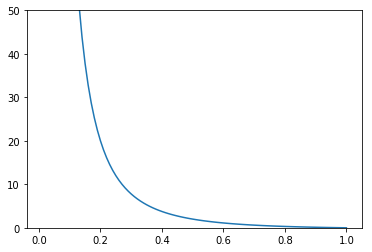

In [6]:
x = np.arange(0.01, 1.01, 0.01)
y = list(map(lambda p: (1-p)/p**2, x))

plt.plot(x, y)
plt.ylim(0, 50)
plt.show()

Anche in questo caso il grafico ottenuto è coerente con il significato probabilistico della distribuzione: al diminuire di $p$ la massa di probabilità si concentra su un insieme sempre più grande di valori, dunque la varianza aumenta. Quando $p=1$ il numero di insuccessi è sempre nullo e quindi la variabile aleatoria degenera in una costante che per definizione ha varianza nulla.

Siamo ora in grado di accoppiare la visualizzazione della funzione di massa di probabilità a un'indicazione del valore atteso e della dispersione della distribuzione. Nella cella seguente viene rigenerato il precedente grafico della massa di probabilità al quale viene aggiunto, nella parte superiore, un rettangolo verde centrato in corrispondenza del valore atteso e largo due deviazioni standard. Anche in questo caso la versione interattiva degli appunti permette di modificare il valore di $p$ e ridisegnare automaticamente l'intero grafico.

In [7]:
from ipywidgets import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def geom_pdf(x, p):
    assert p > 0 and p <= 1, '{} is not a valid parameter ' \
                             'for the geometric distribution.'.format(p)
    
    return p * (1 - p)**x if x==int(x) else 0

def gr_geom_pdf(p):
    x = np.arange(0, 10, 1)
    avg = (1 - p) / p
    stdev = (1-p)**0.5/p
    plt.gca().add_patch(patches.Rectangle(
        (avg-stdev, 0.95), 2*stdev, 0.05, edgecolor='None', facecolor='green'
    ))
    plt.plot([avg, avg], [0.9, 1], color='green')
    plt.vlines(x, [0]*len(x), list(map(lambda _: geom_pdf(_, p), x)))
    plt.plot(x, list(map(lambda _: geom_pdf(_, p), x)), 'o')
    
    plt.ylim(ymax=1, ymin=0)
    plt.xlim(xmax=11, xmin = -1)
    plt.show()

interact(gr_geom_pdf, p=(0.1, 1, 0.1))
plt.show()

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, min=0.1), Output()), _dom_classes=('wid…

La distribuzione geometrica ammette una forma analitica della sua funzione di ripartizione in cui è possibile calcolare esplicitamente il valore della sommatoria. Più precisamente, indicata con $X$ una variabile aleatoria che segue una distribuzione geometrica di parametro $p$, è facile calcolare la probabilità $\mathrm P(X > n)$ per un generico $n$:

\begin{align}
\mathrm P(X > n) &= \sum_{i=n+1}^{+\infty}f_X(i; p) \\
                 &= \sum_{i=n+1}^{+\infty}(1-p)^i p \\
                 &= p (1-p)^{n+1} \sum_{i=n+1}^{+\infty}(1-p)^{i- (n+1)} \\
                 &= p (1-p)^{n+1} \sum_{j=0}^{+\infty}(1-p)^j \\
                 &= p (1-p)^{n+1} \frac{1}{1-(1-p)} \\
                 &= (1-p)^{n+1}.
\end{align}

Pertanto, fissato $n \in \mathbb N$ si avrà

\begin{equation}
F_X(n; p) = \mathrm P(X \leq n) = 1 - \mathrm P(X > n) = 1 - (1-p)^{n+1}.
\end{equation}

Fissato invece un generico $x \in \mathbb R^+$ e indicato con $\lfloor x \rfloor$ l'intero ottenuto troncando $x$ (o, equivalentemente, arrotondandolo per difetto), l'evento $X \leq x$ equivarrà a $X \leq \lfloor x \rfloor$. Tenuto infine conto del fatto che le specificazioni di una distribuzione geometrica sono non negative, si ottiene facilmente la seguente forma più generale per la funzione di ripartizione:

\begin{equation}
F_X(x; p) = \left( 1 - (1 - p)^{\lfloor x \rfloor + 1} \right) \mathrm I_{[0, +\infty]}(x),
\end{equation}

che viene utilizzata nella cella seguente per implementare una funzione `geom_cdf`.

In [8]:
def geom_cdf(x, p):
    assert p > 0 and p <= 1, '{} is not a valid parameter ' \
                             'for the geometric distribution.'.format(p)
    return 1 - (1-p)**(int(x) + 1) if x >= 0 else 0

Il grafico della funzione di ripartizione è visualizzato qui di seguito. Anche in questo caso la visualizzazione, fatta scegliendo $p=0.5$, è modificabile nella versione interattiva degli appunti.

In [9]:
def gr_geom_cdf(p):
    x = np.arange(-2, 10, .1)
    y = list(map(lambda _: geom_cdf(_, p), x))
    plt.step(x, y)
    
    plt.ylim(ymax=1, ymin=-.1)
    plt.xlim(xmax=10, xmin = -2)
    plt.show()

interact(gr_geom_cdf, p=(0.1, 1, 0.1))
plt.show()

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, min=0.1), Output()), _dom_classes=('wid…

Si noti infine che $\mathrm P(X \geq x) = \mathrm P(X \geq \lfloor x \rfloor) = \mathrm P(X > \lfloor x \rfloor - 1) = (1-p)^{\lfloor x \rfloor}$, e quindi

\begin{align}
\mathrm P(X \geq x+y | X \geq x) &= \frac{\mathrm  P(X \geq x+y, X \geq x)}{\mathrm  P(X \geq x)} \\
                                 &= \frac{\mathrm  P(X \geq x+y)}{\mathrm  P(X \geq x)} \\
                                 &= \frac{(1-p)^{\lfloor x \rfloor + \lfloor y \rfloor}}{(1-p)^{\lfloor x \rfloor}} \\
                                 &= (1-p)^{\lfloor y \rfloor} \\
                                 &= \mathrm P(X \geq y).
\end{align}

Questa proprietà prende il nome di _assenza di memoria_. Essa indica che durante la ripetizione dell'esperimento bernoulliano, il fatto che sia avvenuto un numero $n$ (anche elevato) di insuccessi consecutivi non permette di dire alcunché sul numero di successivi insuccessi prima che si verifichi il primo successo. In altre parole, non c'è nessuna differenza, da un punto di vista probabilistico, dalla ripetizione degli esperimenti che vanno dal $n+1$-esimo in poi e dal ricominciare da capo la ripetizione.

<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Distribuzione geometrica, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>